# Leopard challenge Classification

## Загрузка данных
Данные беру из leopard-challenge-classification.zip
https://drive.google.com/file/d/1OYjGYeYQzKI3mE02ymtkrbRJb5EurpL7/view?usp=sharing

# Colab

In [1]:
! gdown --id 1OYjGYeYQzKI3mE02ymtkrbRJb5EurpL7

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


! unzip /content/leopard-challenge-classification.zip -d /content/leopard-challenge-classification/

In [9]:
! unzip /content/leopard-challenge-classification.zip -d /content/leopard_challenge_classification/

"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [32]:
import pandas as pd

In [1]:
df = pd.read_csv('/content/leopard_challenge_classification/train.csv')

NameError: name 'pd' is not defined

In [1]:
df.head()

NameError: name 'train' is not defined

In [ ]:
!pip install phik

!pip install feature_engine

!pip install catboost

# Pycharm

In [1]:
from zipfile import ZipFile

with ZipFile('leopard-challenge-classification.zip', 'r') as zf:
    zf.extractall()

# 1. Задача

Дан набор данных с основными клиническими показателями людей.
Каждая строчка в датасете - клинические показатели одного человека - рост, вес, зрение и т.д.
**Задача:** Определить, курит человек или нет, на основании его показателей.

# 2. Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import phik
import folium
from feature_engine.selection import SmartCorrelatedSelection
from feature_engine.imputation import RandomSampleImputer
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, log_loss
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool, cv
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

# plt.style.use('dark_background')
plt.style.use('seaborn-colorblind')
pd.set_option('display.max_columns', 100)

# 3. Загрузка Датасета

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


In [4]:
df.shape

(13863, 26)

In [5]:
df_test = pd.read_csv('test.csv')

In [6]:
df.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


In [7]:
df_test.shape

(5942, 25)

# 4. Получение информации о Датасете

## 4.1 Подготовка таблиц

### Перевод названий колонок в строчные буквы и замена пробелов

In [11]:
df.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


In [12]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(','_').str.replace(')','_').str.lower()
df_test.columns = df_test.columns.str.replace(' ', '_').str.replace('(','_').str.replace(')','_').str.lower()

## 4.2 Основная информация о датасете

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13863 entries, 0 to 13862
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   13863 non-null  int64  
 1   age                  13863 non-null  int64  
 2   height_cm_           13863 non-null  int64  
 3   weight_kg_           13863 non-null  int64  
 4   waist_cm_            13863 non-null  float64
 5   eyesight_left_       13863 non-null  float64
 6   eyesight_right_      13863 non-null  float64
 7   hearing_left_        13863 non-null  float64
 8   hearing_right_       13863 non-null  float64
 9   systolic             13863 non-null  float64
 10  relaxation           13863 non-null  float64
 11  fasting_blood_sugar  13863 non-null  float64
 12  cholesterol          13863 non-null  float64
 13  triglyceride         13863 non-null  float64
 14  hdl                  13863 non-null  float64
 15  ldl                  13863 non-null 

**Обучающая таблица состоит из:** 13863 строк и 26 столбцов

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5942 entries, 0 to 5941
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5942 non-null   int64  
 1   age                  5942 non-null   int64  
 2   height_cm_           5942 non-null   int64  
 3   weight_kg_           5942 non-null   int64  
 4   waist_cm_            5942 non-null   float64
 5   eyesight_left_       5942 non-null   float64
 6   eyesight_right_      5942 non-null   float64
 7   hearing_left_        5942 non-null   float64
 8   hearing_right_       5942 non-null   float64
 9   systolic             5942 non-null   float64
 10  relaxation           5942 non-null   float64
 11  fasting_blood_sugar  5942 non-null   float64
 12  cholesterol          5942 non-null   float64
 13  triglyceride         5942 non-null   float64
 14  hdl                  5942 non-null   float64
 15  ldl                  5942 non-null   f

**Тестовая таблица состоит из:** 5942 строк и 25 столбцов

## 4.3 Пропущенные значения

In [16]:
df.isna().mean().sort_values(ascending=False)

id                     0.0
age                    0.0
tartar                 0.0
dental_caries          0.0
oral                   0.0
gtp                    0.0
alt                    0.0
ast                    0.0
serum_creatinine       0.0
urine_protein          0.0
hemoglobin             0.0
ldl                    0.0
hdl                    0.0
triglyceride           0.0
cholesterol            0.0
fasting_blood_sugar    0.0
relaxation             0.0
systolic               0.0
hearing_right_         0.0
hearing_left_          0.0
eyesight_right_        0.0
eyesight_left_         0.0
waist_cm_              0.0
weight_kg_             0.0
height_cm_             0.0
smoking                0.0
dtype: float64

In [17]:
df_test.isna().mean().sort_values(ascending=False)

id                     0.0
triglyceride           0.0
dental_caries          0.0
oral                   0.0
gtp                    0.0
alt                    0.0
ast                    0.0
serum_creatinine       0.0
urine_protein          0.0
hemoglobin             0.0
ldl                    0.0
hdl                    0.0
cholesterol            0.0
age                    0.0
fasting_blood_sugar    0.0
relaxation             0.0
systolic               0.0
hearing_right_         0.0
hearing_left_          0.0
eyesight_right_        0.0
eyesight_left_         0.0
waist_cm_              0.0
weight_kg_             0.0
height_cm_             0.0
tartar                 0.0
dtype: float64

**Пропуски в данных отсутствуют!!**

## 4.4 Дубликаты

In [18]:
df.duplicated().sum()

0

In [19]:
df_test.duplicated().sum()

0

**Дубликаты отсутствуют!**

## 4.5 Числовые переменные

In [20]:
df.describe()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,smoking
count,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000
mean,9932.891654,41.743851,169.618409,71.270288,84.870627,1.057304,1.053740,1.028060,1.027411,123.430643,77.166703,99.937387,193.864387,130.917767,54.204357,114.435476,15.402200,1.093775,0.981808,27.597562,30.772921,43.442978,0.212075,0.201976
std,5715.739532,13.624383,6.493959,11.195751,8.194957,0.514618,0.514613,0.165151,0.163284,12.964684,9.459288,20.682085,35.658783,71.348298,13.168432,42.050428,1.052598,0.421272,0.240337,21.559820,36.441688,50.342097,0.408793,0.401489
min,1.000000,20.000000,145.000000,40.000000,51.000000,0.100000,0.100000,1.000000,1.000000,74.000000,40.000000,48.000000,84.000000,16.000000,4.000000,7.000000,6.300000,1.000000,0.100000,7.000000,2.000000,2.000000,0.000000,0.000000
25%,4985.500000,30.000000,165.000000,65.000000,79.200000,0.800000,0.800000,1.000000,1.000000,115.000000,70.000000,90.000000,169.000000,78.000000,45.000000,91.000000,14.800000,1.000000,0.900000,20.000000,18.000000,20.000000,0.000000,0.000000
50%,9956.000000,40.000000,170.000000,70.000000,84.400000,1.000000,1.000000,1.000000,1.000000,122.000000,78.000000,96.000000,192.000000,113.000000,53.000000,113.000000,15.400000,1.000000,1.000000,24.000000,24.000000,29.000000,0.000000,0.000000
75%,14865.500000,50.000000,175.000000,80.000000,90.000000,1.200000,1.200000,1.000000,1.000000,131.000000,83.000000,104.000000,216.000000,166.000000,61.000000,135.000000,16.100000,1.000000,1.100000,30.000000,35.000000,48.000000,0.000000,0.000000
max,19804.000000,85.000000,190.000000,130.000000,128.000000,9.900000,9.900000,2.000000,2.000000,240.000000,140.000000,475.000000,441.000000,466.000000,359.000000,1340.000000,19.600000,6.000000,10.000000,981.000000,2914.000000,999.000000,1.000000,1.000000


#### Описание числовых переменных
**1. Возраст** Минимальный - 20, Максимальный - 85, Средний ≈41, Медианный ≈40
**2. Рост (см)** Минимальный - 145, Максимальны 190, Средний ≈169, Медианный ≈170
**3. Вес (кг)** Минимальный - 40, Максимальный 130, Средний ≈71.2, Медианный ≈70
**4. Окружность талии (см)** Минимальная - 51, Максимальная - 128, Средняя ≈84.8 Медианная ≈84.4
**5. Зрение (левый глаз)** Минимальное 0.1, Максимальное 9.9 (**ВЫБРОС?**) Среднее ≈1.05, Медианное ≈1
**6. Зрение (правый глаз)** Минимальное 0.1, Максимальное 9.9 (**ВЫБРОС?**) Среднее ≈1.05, Медианное ≈1
**7. Слух (левое ухо)** Минимальный 1, Максимальный 2, Средний ≈1.02, Медианный ≈1
**8. Слух (правое ухо)** Минимальный 1, Максимальный 2, Средний ≈1.02, Медианный ≈1
**9. Систолическое давление** Минимальное 74, Максимальное 240(**ВЫБРОС?**) Среднее ≈123.4, Медианное ≈122
**10. Диастолическое давление** Минимальное 40, Максимальное 140(**ВЫБРОС?**) Среднее ≈77.1, Медианное ≈78
**11. Сахар в крови** Минимальный 48, Максимальный 475(**ВЫБРОС?**), Средний ≈99, Медианный 96
**12. Холестерин** Минимальный 84, Максимальный 441, Средний ≈193.8, Медианный 192
**13. Триглицирид** Минимальный 16, Максимальный 466 (**ВЫБРОС?**), Средний ≈130.9, Медианный 113
**14. HDL холестерин липопротеинов высокой плотности** Минимальный 4, Максимальный 359(**ВЫБРОС?**), Средний ≈54.2, Медианный 53
**15. LDL липопротеины низкой плотности** Минимальный 7, Максимальный 1340 (**ВЫБРОС?**), Средний ≈114.4, Медианный 135
**16. Гемоглобин** Минимальный 6.3, Максимальный 19.6, Средний ≈15.4, Медианный 15.4
**17. Белок в моче** Минимальный 1, Максимальный 6(**ВЫБРОС?**), Средний ≈1.09, Медианный 1
**18. Сывороточный креатинин** Минимальный 0.1, Максимальный 10(**ВЫБРОС?**), Средний ≈0.98, Медианный 1
**19. AST Аспартатаминотрансфераза** Минимальный 7, Максимальный 981(**ВЫБРОС?**), Средний ≈27.59, Медианный 24
**20. ALT Аланинаминотрансфераза** Минимальный 2, Максимальный 2914(**ВЫБРОС?**), Средний ≈30.77, Медианный 24
**21. Gtp Гамма‑глютамилтранспептидаза** Минимальный 2, Максимальный 999(**ВЫБРОС?**), Средний ≈43.4, Медианный 29
**22. Кариес** Минимальный 0, Максимальный 1, Средний ≈0.212, Медианный 0

## 4.6 Категориальные переменные

In [21]:
df.describe(include='object').T

,count,unique,top,freq
oral,13863,1,Y,13863
tartar,13863,2,Y,7517


In [22]:
df.oral.value_counts()

Y    13863
Name: oral, dtype: int64

In [23]:
df.tartar.value_counts()

Y    7517
N    6346
Name: tartar, dtype: int64

#### Описание числовых переменных
**1. Полость рта** Странная колонка, где все значения - **Y**, то есть ДА
**2. Зубной камень** 7517 - **Y**, 6346 - **N**

# 5.EDA

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13863 entries, 0 to 13862
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   13863 non-null  int64  
 1   age                  13863 non-null  int64  
 2   height_cm_           13863 non-null  int64  
 3   weight_kg_           13863 non-null  int64  
 4   waist_cm_            13863 non-null  float64
 5   eyesight_left_       13863 non-null  float64
 6   eyesight_right_      13863 non-null  float64
 7   hearing_left_        13863 non-null  float64
 8   hearing_right_       13863 non-null  float64
 9   systolic             13863 non-null  float64
 10  relaxation           13863 non-null  float64
 11  fasting_blood_sugar  13863 non-null  float64
 12  cholesterol          13863 non-null  float64
 13  triglyceride         13863 non-null  float64
 14  hdl                  13863 non-null  float64
 15  ldl                  13863 non-null 

## 5.1 Phik взаимосвязь

In [25]:
phik_overview = df.phik_matrix(verbose=False)
phik_overview['smoking'].round(2).sort_values(ascending=False)

smoking                1.00
triglyceride           0.19
age                    0.18
gtp                    0.14
hemoglobin             0.11
tartar                 0.10
dental_caries          0.09
waist_cm_              0.06
serum_creatinine       0.06
hdl                    0.05
height_cm_             0.04
weight_kg_             0.04
hearing_left_          0.04
fasting_blood_sugar    0.04
urine_protein          0.03
cholesterol            0.02
ldl                    0.02
relaxation             0.02
systolic               0.02
hearing_right_         0.02
alt                    0.01
ast                    0.00
eyesight_right_        0.00
eyesight_left_         0.00
id                     0.00
Name: smoking, dtype: float64

## 5.2 Корреляция признаков

In [26]:
corr_matrix = df.corr()
corr_matrix['smoking'].sort_values(ascending=False)

smoking                1.000000
triglyceride           0.148264
gtp                    0.133900
hemoglobin             0.082029
dental_caries          0.057663
fasting_blood_sugar    0.047777
height_cm_             0.026243
urine_protein          0.022789
ast                    0.020400
relaxation             0.018753
waist_cm_              0.015579
alt                    0.015452
weight_kg_             0.011526
id                     0.007011
cholesterol            0.006247
eyesight_right_       -0.008161
systolic              -0.010530
eyesight_left_        -0.010562
age                   -0.014082
hearing_right_        -0.018433
hearing_left_         -0.024554
ldl                   -0.035390
serum_creatinine      -0.041838
hdl                   -0.042110
Name: smoking, dtype: float64

In [27]:
# attributes = ['smoking', 'triglyceride', 'gtp', 'hemoglobin', 'dental_caries', 'fasting_blood_sugar']
# pd.plotting.scatter_matrix(df[attributes], figsize=(15,8))
# plt.show()

Оценка зависимостей на графике heatmap

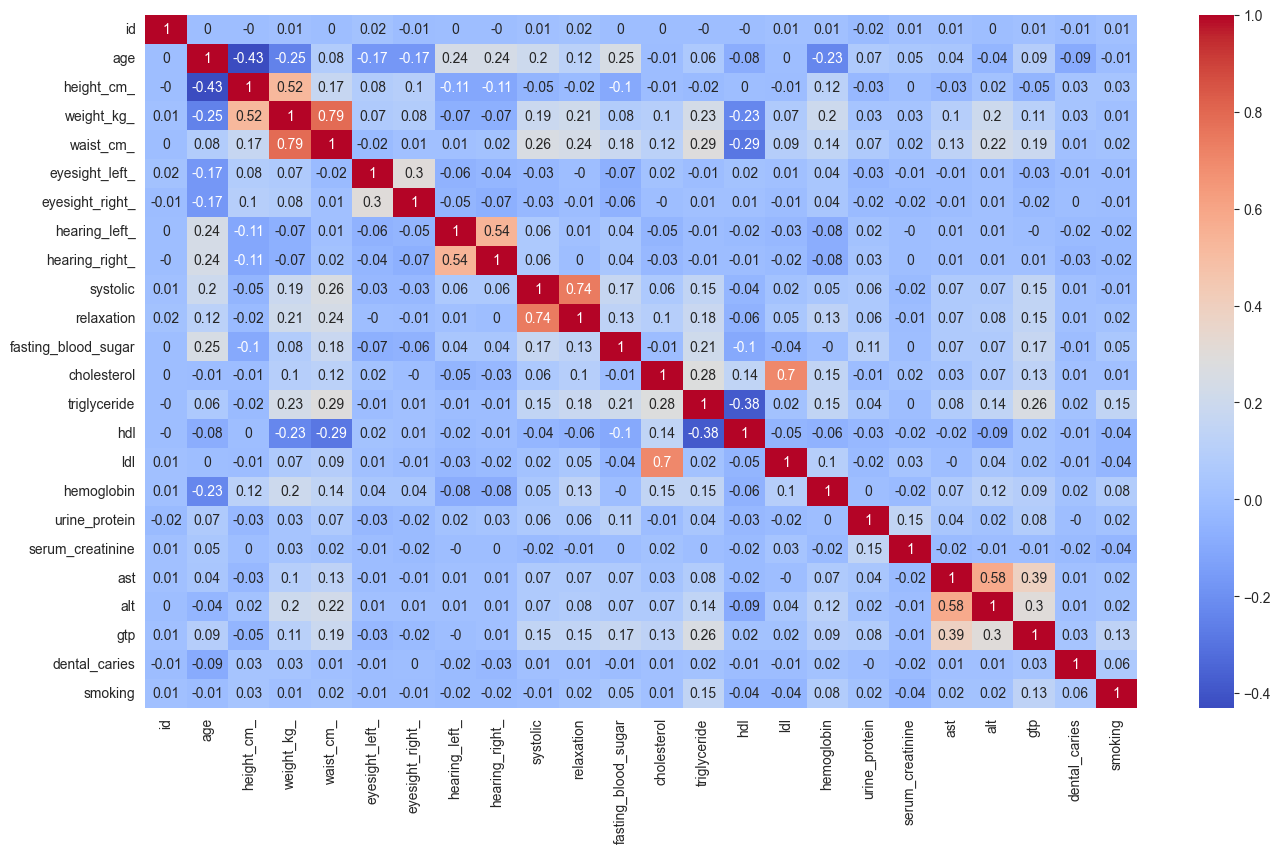

In [28]:
plt.figure(figsize=(16, 9))
sns.heatmap(round(df.corr(),2), annot=True, cmap='coolwarm')
plt.show()

Проверка на корреляцию

In [29]:
correlated = SmartCorrelatedSelection(
    variables= None,
    method = 'pearson',
    threshold = 0.8,
    missing_values = 'ignore',
    selection_method = 'variance',
    estimator=None,
    scoring = 'roc_auc',
    cv=5)

correlated.fit(df)

SmartCorrelatedSelection(cv=5, selection_method='variance')

Смарт корреляция не рекомендует каких либо признаков к дропу

In [30]:
correlated.features_to_drop_

[]

## 5.3 Количественные признаки

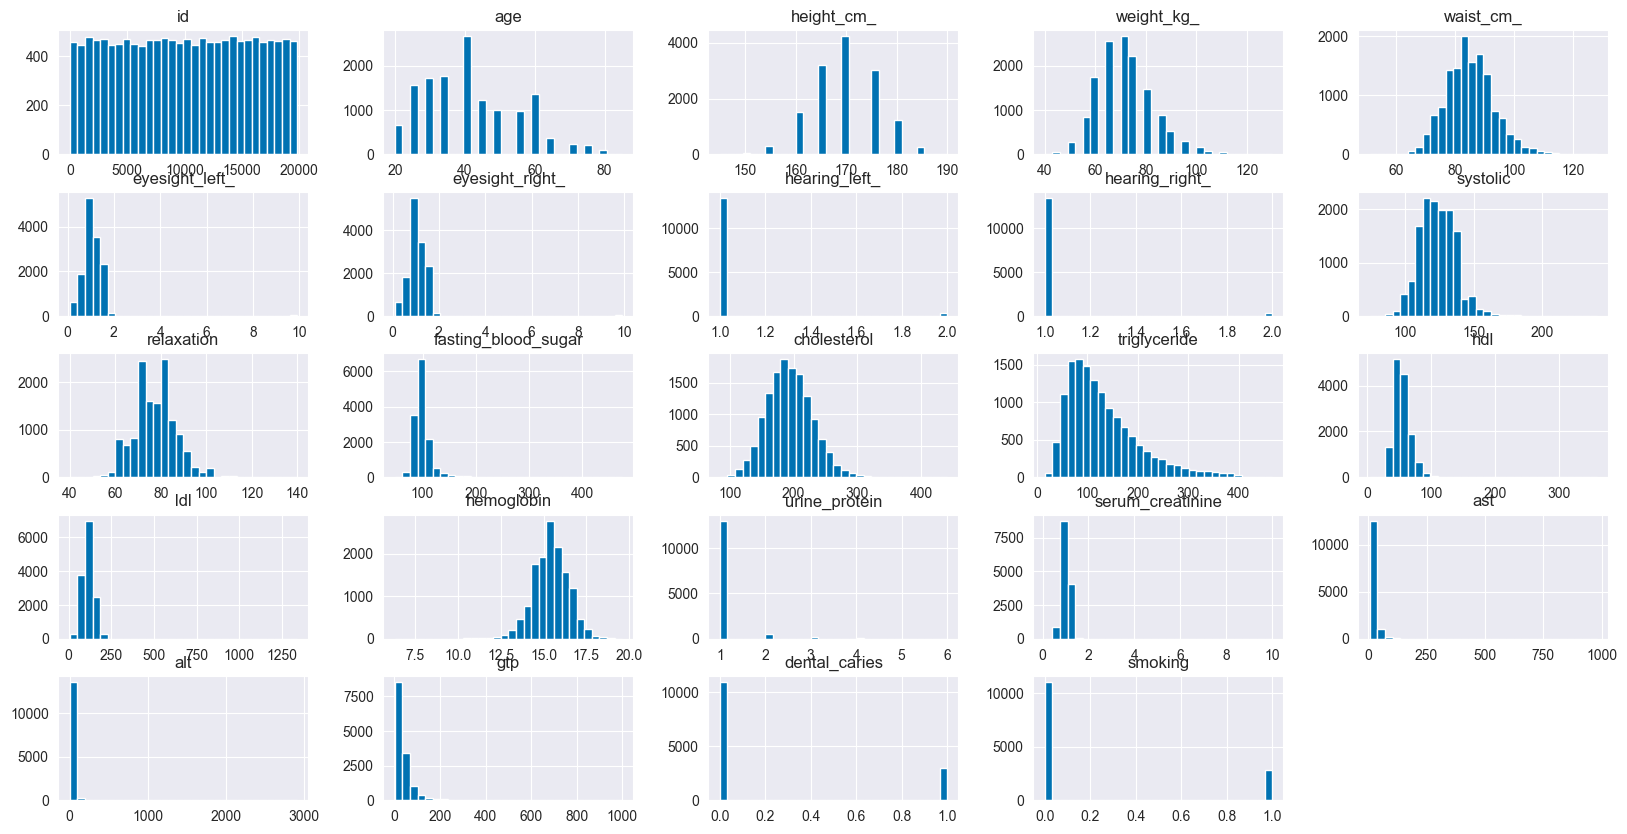

In [31]:
df.hist(figsize=(20, 10), bins=30, legend=False);
plt.show()

#### Функция гистограммы и описания для количественных признаков

In [32]:
def hist_box_describe_num(ds, x):
    print(ds[x].describe())
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.histplot(data=ds, x=ds[x], kde=True);
    plt.subplot(1,2,2)
    sns.boxplot(data=ds, y=ds[x]);

### Smoking - Распределение курильшиков

Бинарный признак

In [33]:
df.smoking.value_counts()

0    11063
1     2800
Name: smoking, dtype: int64

count    13863.000000
mean         0.201976
std          0.401489
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: smoking, dtype: float64


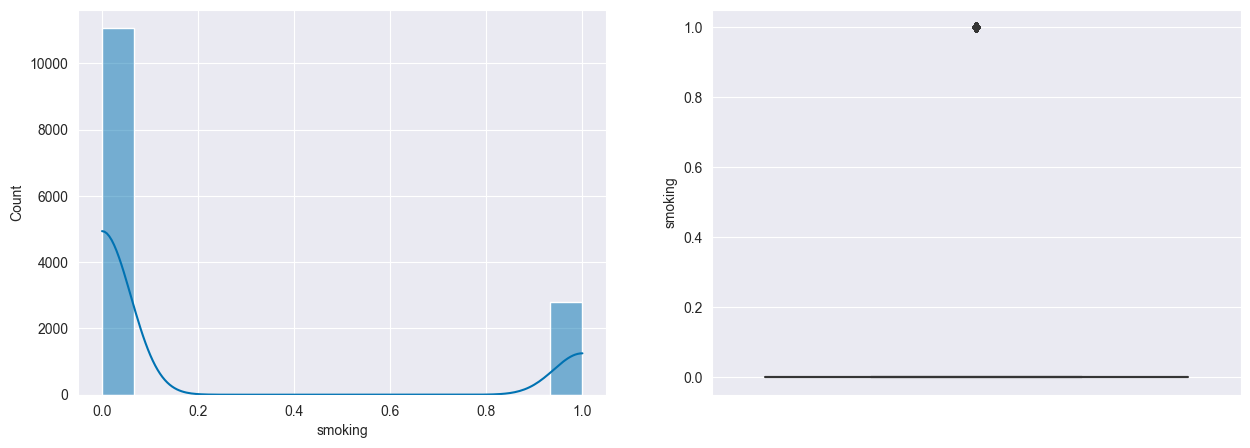

In [34]:
hist_box_describe_num(df, 'smoking')

Курильшиков ≈ 20% в обучающей выборке

### Age - возраст

count    13863.000000
mean        41.743851
std         13.624383
min         20.000000
25%         30.000000
50%         40.000000
75%         50.000000
max         85.000000
Name: age, dtype: float64


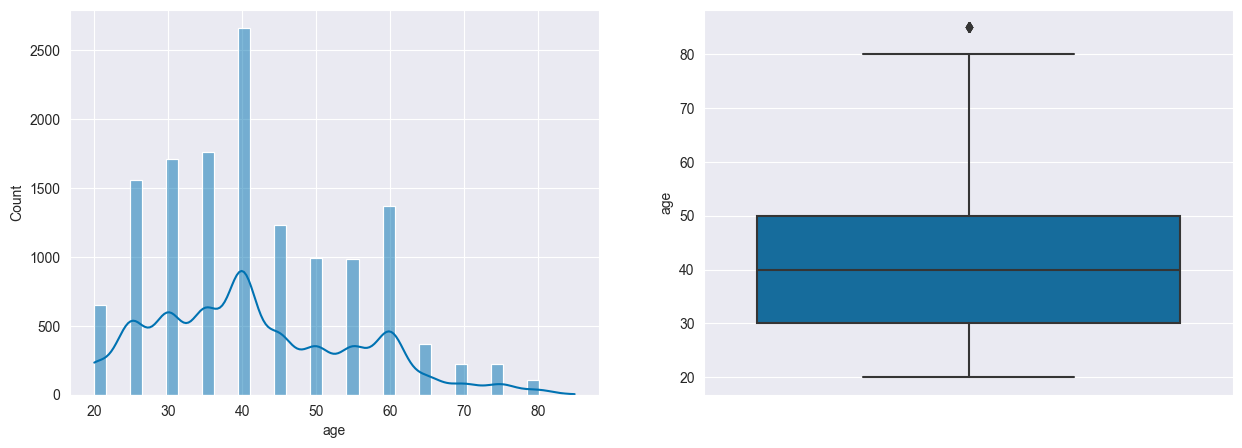

In [35]:
hist_box_describe_num(df, 'age')

Половина людей от 30 до 50 лет

### Height - рост

count    13863.000000
mean       169.618409
std          6.493959
min        145.000000
25%        165.000000
50%        170.000000
75%        175.000000
max        190.000000
Name: height_cm_, dtype: float64


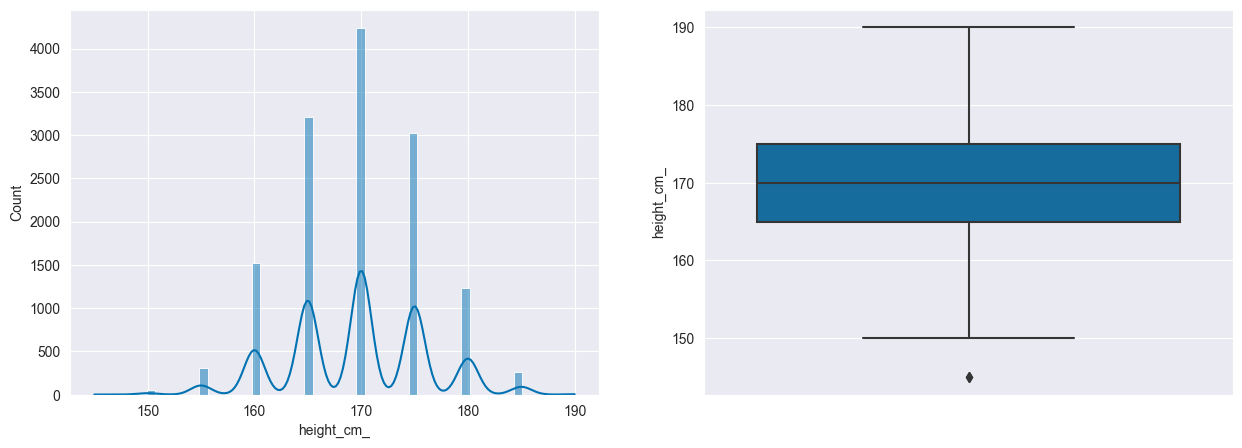

In [37]:
hist_box_describe_num(df, 'height_cm_')

Половина пациентов имеют рост от 165 до 175

### Waist - окружность талии

count    13863.000000
mean        84.870627
std          8.194957
min         51.000000
25%         79.200000
50%         84.400000
75%         90.000000
max        128.000000
Name: waist_cm_, dtype: float64


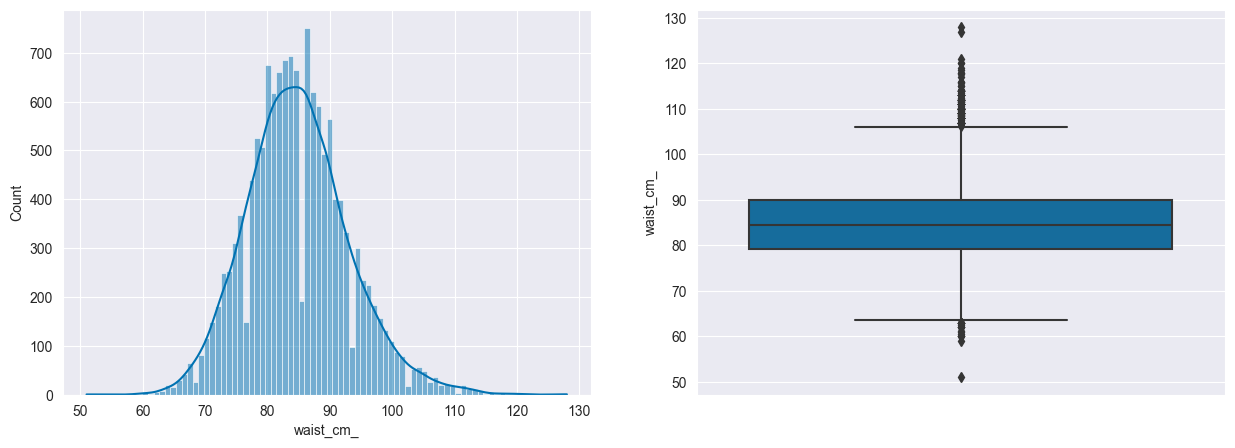

In [39]:
hist_box_describe_num(df, 'waist_cm_')

У половины пациентов окружность талии составляет от 79 до 90 см

### Eyesight left - зрение левого глаза

count    13863.000000
mean         1.057304
std          0.514618
min          0.100000
25%          0.800000
50%          1.000000
75%          1.200000
max          9.900000
Name: eyesight_left_, dtype: float64


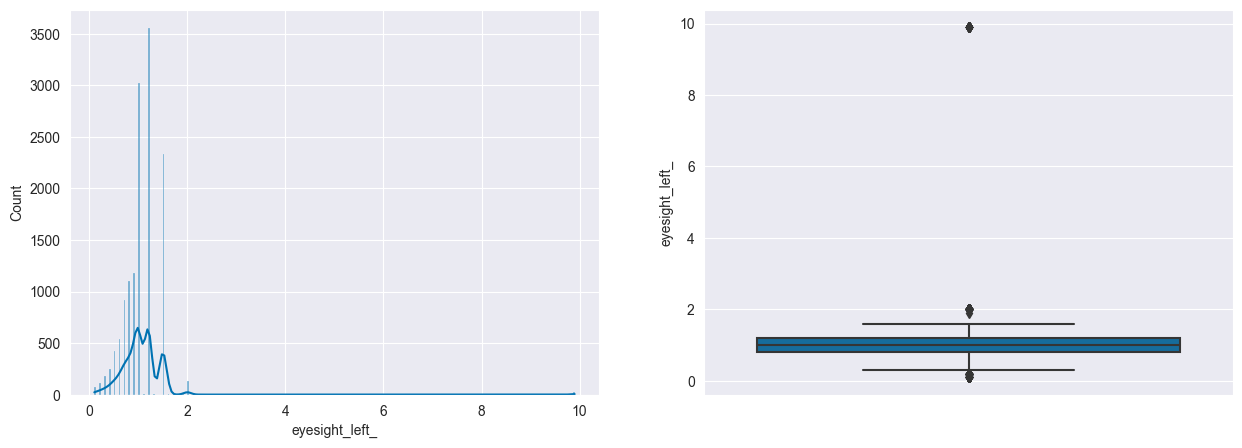

In [40]:
hist_box_describe_num(df, 'eyesight_left_')

Есть выбросы максимальных значений - 28, что составляет ≈0.2% от обучающей выборки
В тестовой выборке похожие выбросы

count    13835.000000
mean         1.039407
std          0.326779
min          0.100000
25%          0.800000
50%          1.000000
75%          1.200000
max          2.000000
Name: eyesight_left_, dtype: float64


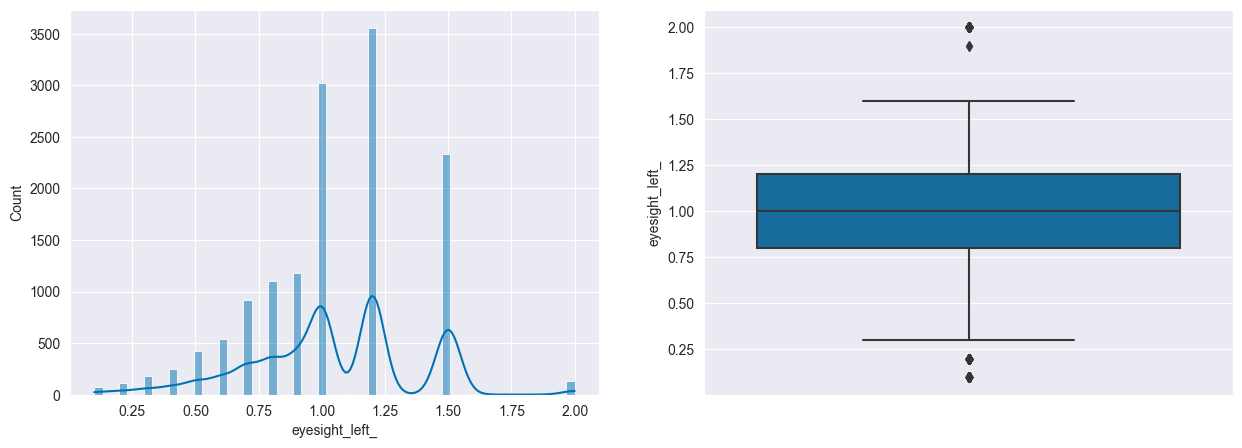

In [47]:
hist_box_describe_num(df.query('eyesight_left_ < 9'), 'eyesight_left_')

### Eyesight right - зрение правого глаза

count    13863.000000
mean         1.053740
std          0.514613
min          0.100000
25%          0.800000
50%          1.000000
75%          1.200000
max          9.900000
Name: eyesight_right_, dtype: float64


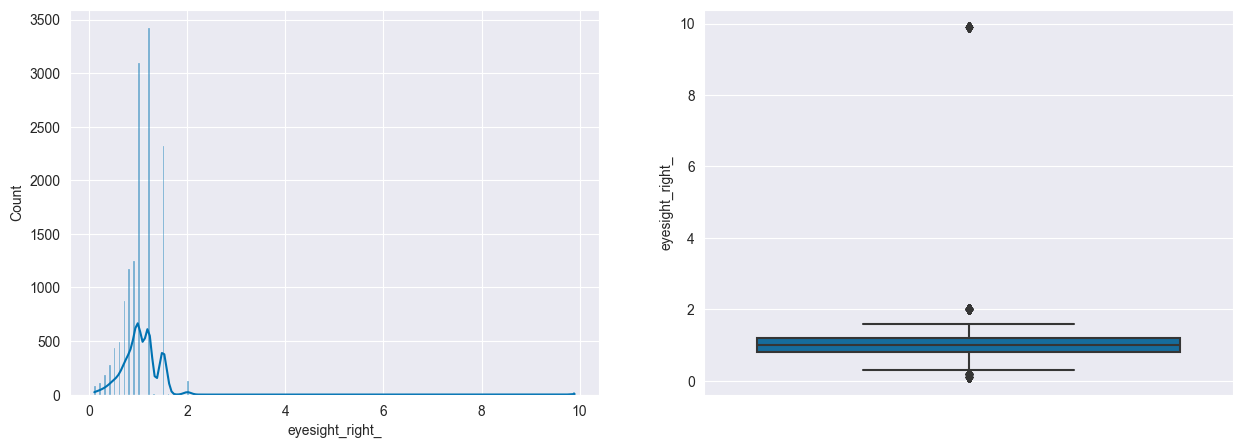

In [50]:
hist_box_describe_num(df, 'eyesight_right_')

Есть выбросы максимальных значений - 28, что составляет ≈0.2% от обучающей выборки
В тестовой выборке похожие выбросы

count    13835.000000
mean         1.035837
std          0.326575
min          0.100000
25%          0.800000
50%          1.000000
75%          1.200000
max          2.000000
Name: eyesight_right_, dtype: float64


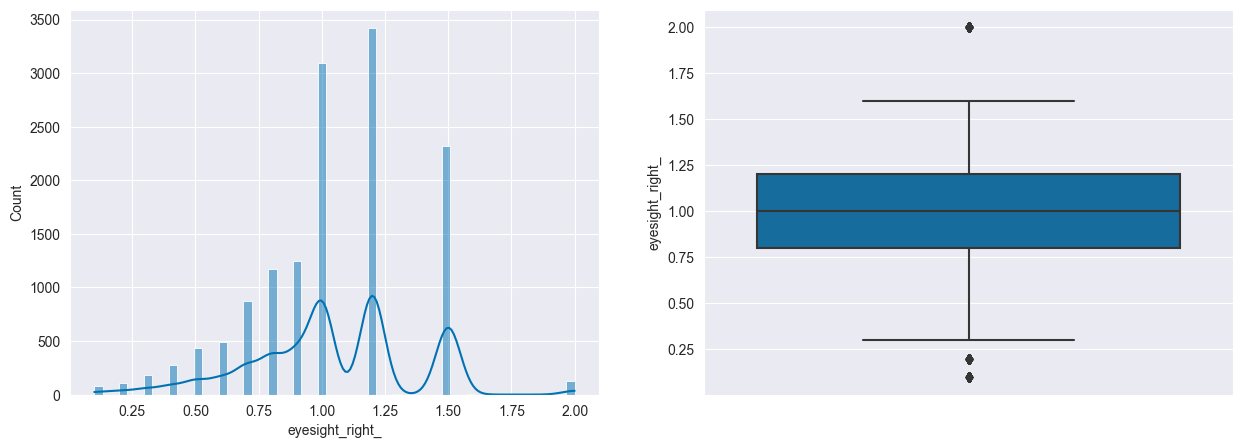

In [51]:
hist_box_describe_num(df.query('eyesight_right_ < 9'), 'eyesight_right_')

### Hearing left - слышимость левого уха

Бинарный признак

In [56]:
df.hearing_left_.value_counts()

1.0    13474
2.0      389
Name: hearing_left_, dtype: int64

У ≈2.8% пациентов не слышит левое ухо

count    13863.000000
mean         1.028060
std          0.165151
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: hearing_left_, dtype: float64


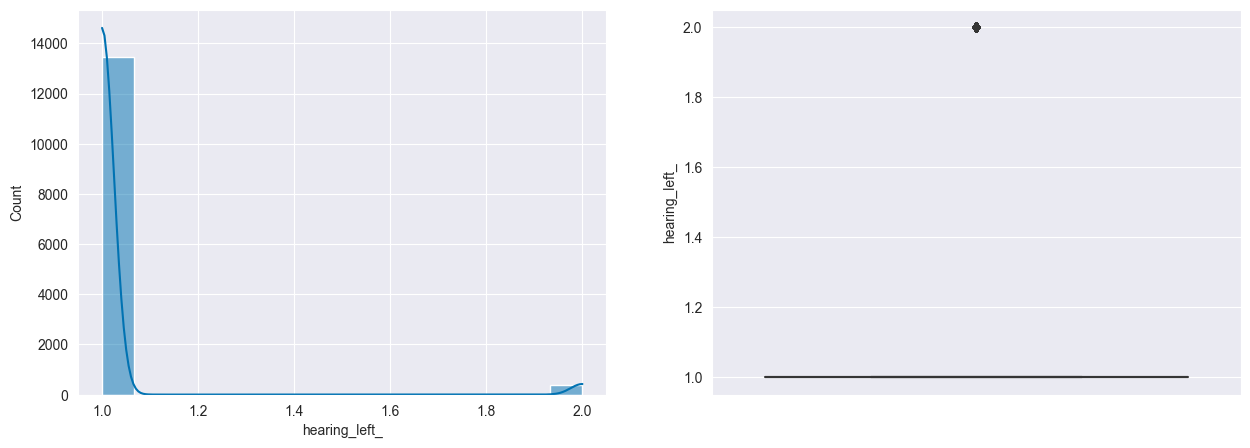

In [66]:
hist_box_describe_num(df, 'hearing_left_')

### Hearing right - слышимость правого уха

Бинарный признак

In [57]:
df.hearing_right_.value_counts()

1.0    13483
2.0      380
Name: hearing_right_, dtype: int64

У ≈2.7% пациентов не слышит правое ухо

count    13863.000000
mean         1.027411
std          0.163284
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: hearing_right_, dtype: float64


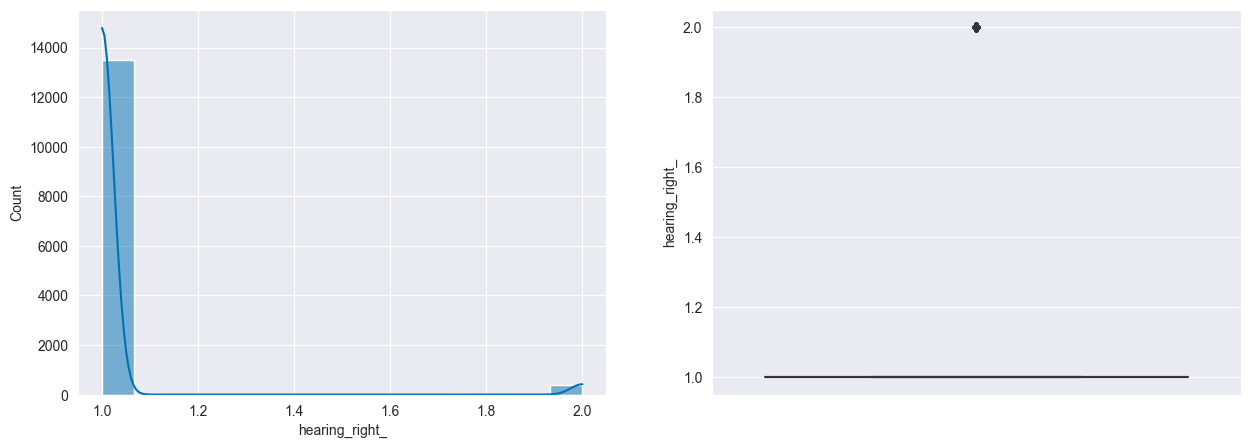

In [59]:
hist_box_describe_num(df, 'hearing_right_')

In [67]:
df_test.hearing_right_.value_counts()

1.0    5793
2.0     149
Name: hearing_right_, dtype: int64

### Systolic - систолическое давление

count    13863.000000
mean       123.430643
std         12.964684
min         74.000000
25%        115.000000
50%        122.000000
75%        131.000000
max        240.000000
Name: systolic, dtype: float64


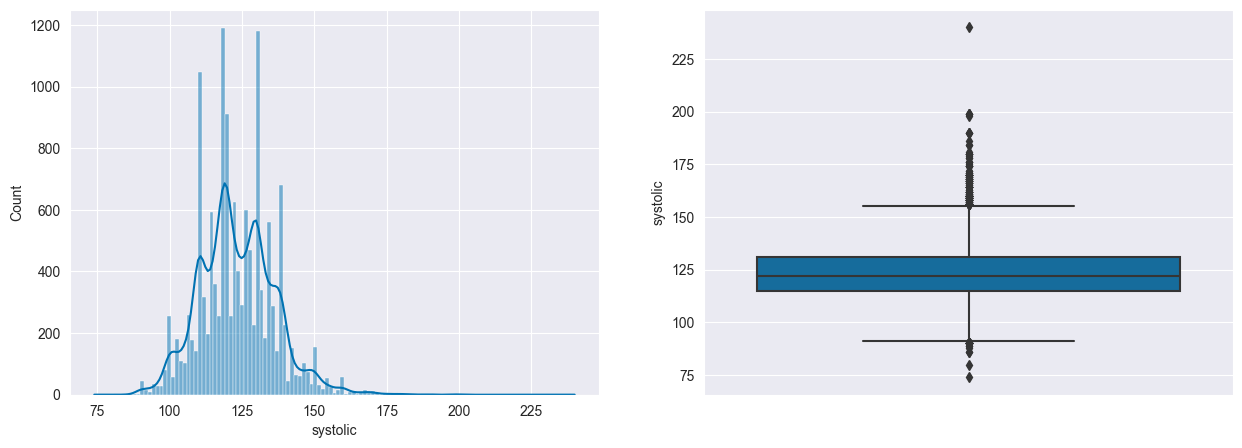

In [60]:
hist_box_describe_num(df, 'systolic')

У половины пациентов систолическое давление находится в пределах от 115 до 131
**Выбросы в сравнении с тестом:** 1 пациент - 240

count    13862.000000
mean       123.422233
std         12.927287
min         74.000000
25%        115.000000
50%        122.000000
75%        131.000000
max        199.000000
Name: systolic, dtype: float64


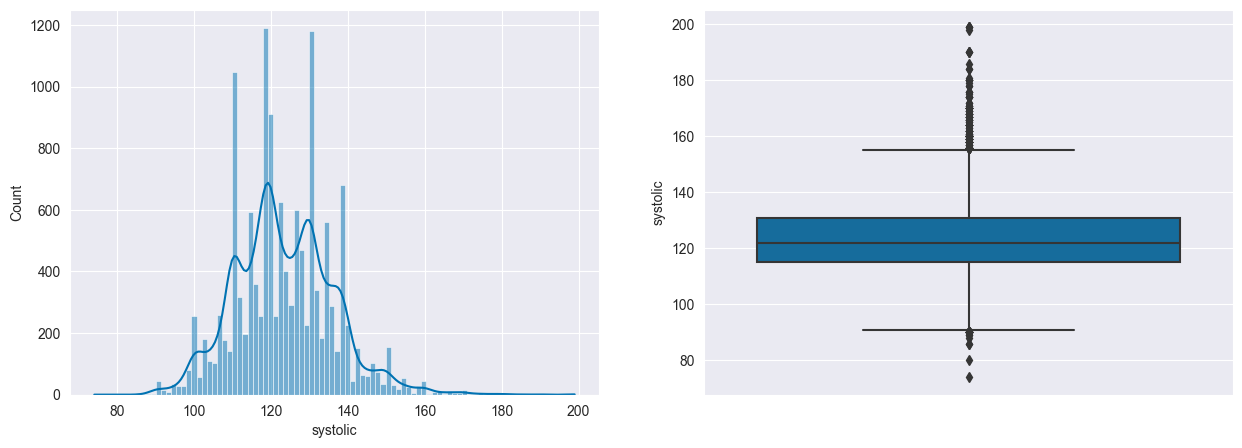

In [68]:
hist_box_describe_num(df.query('systolic < 230'), 'systolic')